# Basic Exploratory Data Analysis with NLP
Prepared by: `Pat Estrada`, `Ace Canacan Jr`

## Setup libraries and data loading

Install the necessary libraries: nltk for natural language processing, wordcloud for generating word cloud images, and matplotlib for plotting.

Import the functions and libraries that will be utilized in subsequent steps.

In [ ]:
# !pip install nltk wordcloud matplotlib

In [ ]:
# for data load and wrangling
import pandas as pd

# for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords') # Downloads the list of stopwords

# for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrishaestrada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('data/20-24-rappler-tech.csv')
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732]
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]"
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732]
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]"


## Extract titles and tokenize text

We concatenate all the titles into a single string and then __tokenize__ it, which means breaking it down into individual words.

In [ ]:
# Extracting the titles from the dataset
titles = df['title.rendered'].str.cat(sep=' ').lower()

# Tokenize the titles
tokens = word_tokenize(titles)

In [ ]:
# Sample
df['title.rendered'].iloc[0:20].str.cat(sep=' ')

'Sam Bankman-Fried will not face a second trial New York Times sues OpenAI, Microsoft for copyright infringement Elon Musk&#8217;s X fails to block California&#8217;s content moderation law China&#8217;s Xiaomi unveils first electric car, plans to become top automaker Apple can temporarily sell smartwatches after US appeals court win In 2023, majority of users expressed concern over generative AI use on social media Half of users to ‘significantly limit’ social media interactions by 2025 Taiwan expands Russian sanctions to stop tech being used for arms AI progress must be brought to ‘human scale,’ says Hontiveros, as disruption looms ChatGPT and its AI chatbot cousins ruled 2023: 4 essential reads that puncture the hype Disinformation tactics used against you, as explained by a social psychologist Chipmaker Nvidia raises $15M for non-profits helping Israel-Hamas war-hit civilians Twitter violated contract by failing to pay millions in bonuses, US judge rules How did the top smartphone 

## Text preprocessing & basic text statistics

Here, we preprocess the tokens by converting all words to lowercase, filtering out non-alphabetical tokens, and remove common stop words.

In [ ]:
tokens = [
    word.lower() for word in tokens
    if word not in stopwords.words('english')
    and word.isalpha()
] # word not in string.punctuation

After this, we count the frequency of each word and display the top 10 words

In [ ]:
word_counts = nltk.FreqDist(tokens)

print("Top 10 words by frequency:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")

Top 10 words by frequency:
facebook: 515
us: 457
twitter: 413
says: 322
google: 311
new: 277
ai: 255
apple: 240
musk: 209
tech: 198


## Visualizing word frequencies using a bar chart

We can visualize the frequency of the top words in a bar chart. By plotting this, we can quickly understand which words dominate our dataset and make decisions or inferences based on these insights

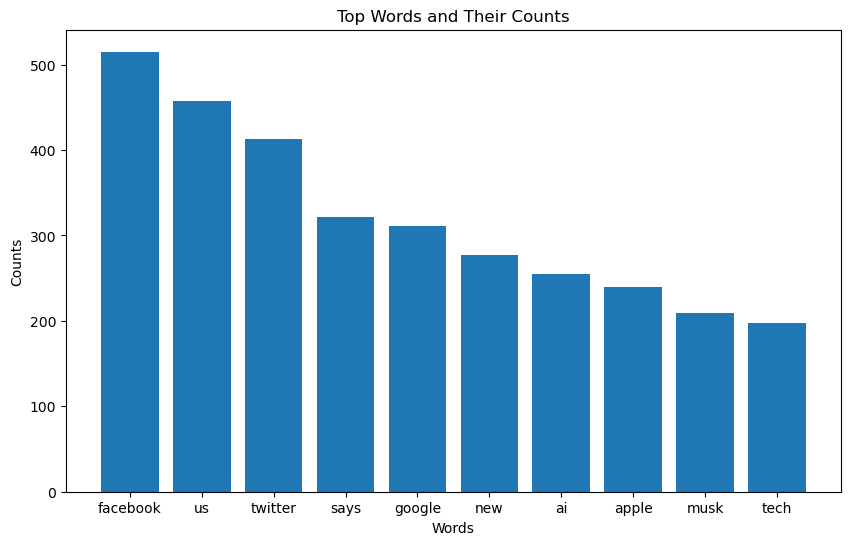

In [ ]:
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
# plt.barh(words, counts)
plt.title('Top Words and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
# plt.gca().invert_yaxis()
plt.show()

## Generating word clouds

We can also generate other NLP visualizations like word clouds. Word clouds provide a visual representation of the most frequently occurring words in the dataset. Words that occur more often appear larger in the cloud. Using `WordCloud`, we can easily generate a word cloud and also exclude common words (stop words) like "and", "the", etc.

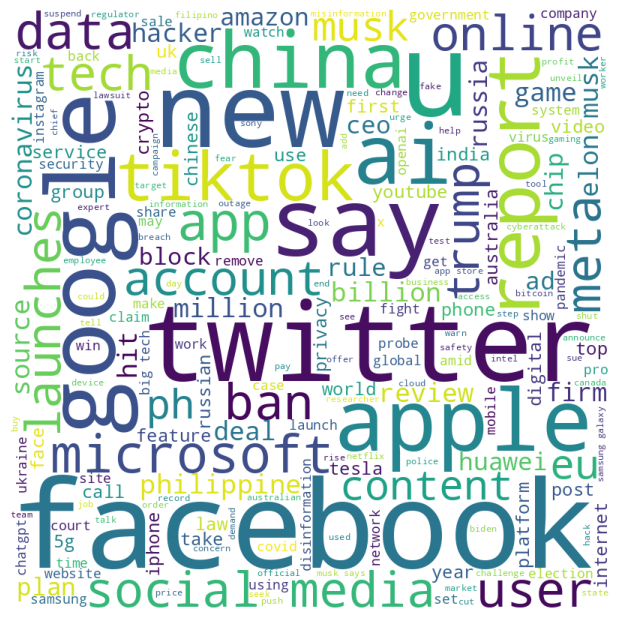

In [ ]:
def generate_wordcloud(text, stop_words=stopwords.words('english')):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stop_words,
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

generate_wordcloud(titles)

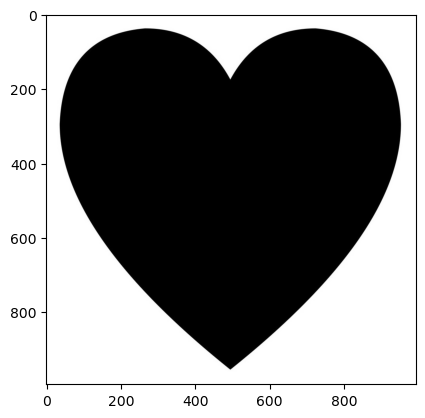

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open('data/sample-mask.jpeg'))
plt.imshow(mask);

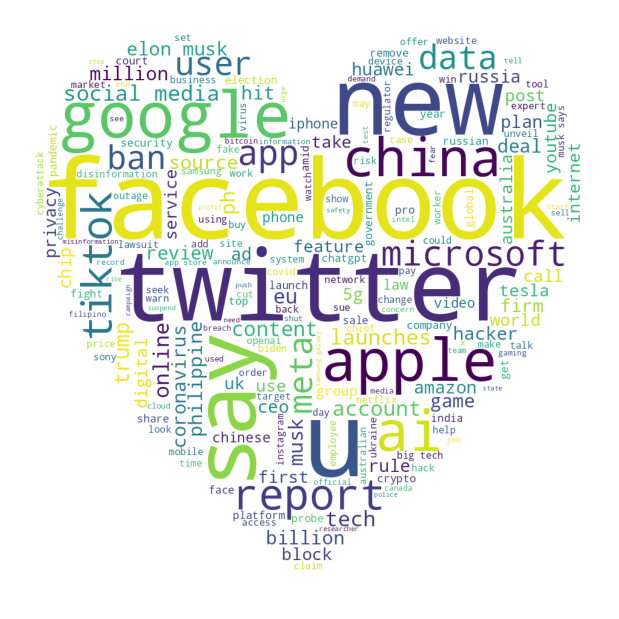

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open('data/sample-mask.jpeg'))
wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10,
                          mask=mask).generate(titles)


plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Exercise: Text Preprocessing + Basic EDA


__Objective:__
* Practice text preprocessing for rendered titles and content of articles.

    __Note:__ There are a lot of HTML tags present in the text. You may clean the text columns however you like, but you are encouraged to explore [`regular expressions`](https://docs.python.org/3/howto/regex.html) and libraries like [`unidecode`](https://github.com/avian2/unidecode), or [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to preprocess them. Alternatively, you can ask ChatGPT to create your initial text preprocessing function and simply debug its code if it does not work.

__Instructions:__
* Create a function `preprocess_text` to cleans unnecessary characters (including HTML tags) in the text columns.
* Clean `title.rendered` and store the results in `title.cleaned`.
* Clean `content.rendered` and store the results in `content.cleaned`.
* Generate word clouds for `title.cleaned` and for `content.cleaned`.
* Note all observations.

In [ ]:
# pip install beautifulsoup4 Unidecode

In [ ]:
from bs4 import BeautifulSoup
from unidecode import unidecode
import re
import warnings

warnings.filterwarnings('ignore')

def preprocess_text(text):
    if not isinstance(text, str):
        return text

    text = unidecode(text)

    pattern = re.compile(r'[\t\n]|<.*?>|!function.*;|\.igframe.*}')
    text = pattern.sub(' ', text)
    text = (
        text
        .replace('&#8217;', "'")
        .replace('&#8220;', '"')
        .replace('&#8221;', '"')
    )

    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text()
    return cleaned_text

df['title.cleaned'] = df['title.rendered'].apply(preprocess_text)
df['content.cleaned'] = df['content.rendered'].apply(preprocess_text)

df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...


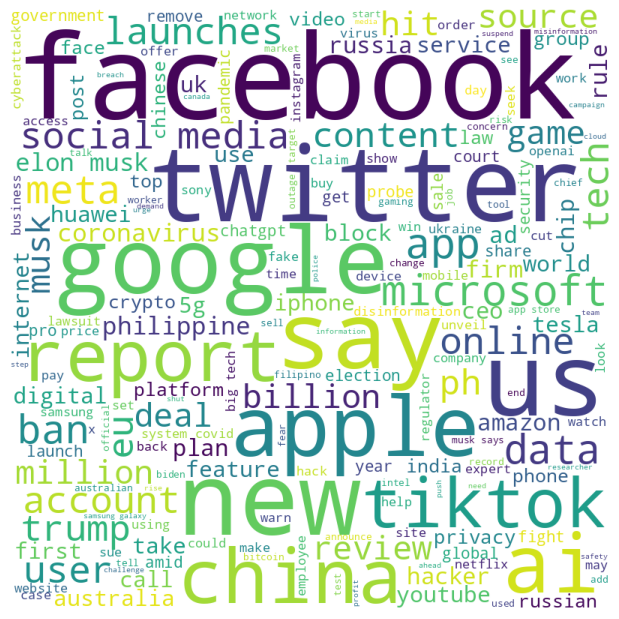

In [ ]:
titles = df['title.cleaned'].str.cat(sep=' ').lower()

stop_words = stopwords.words('english') + ['u']
generate_wordcloud(titles, stop_words=stop_words)

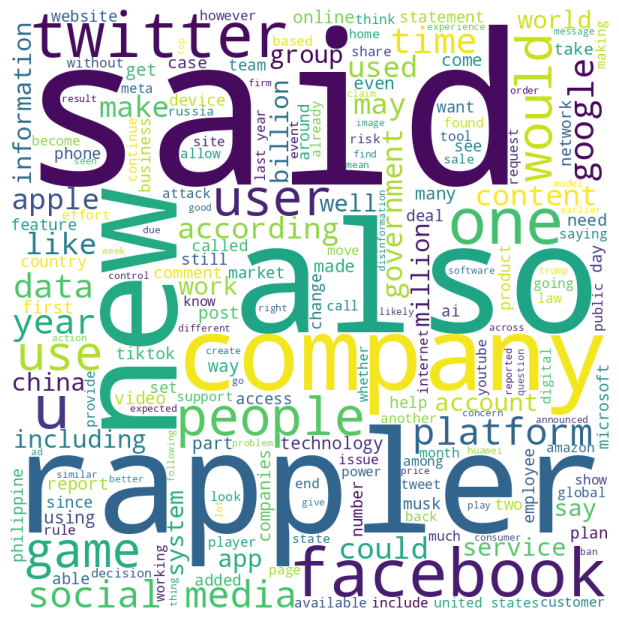

In [ ]:
content = df['content.cleaned'].str.cat(sep=' ').lower()

stop_words = stopwords.words('english') + ['com']
generate_wordcloud(content, stop_words=stop_words)

In [ ]:
df.to_csv('data/20-24-rappler-tech-cleaned.csv', index=False)